# Module 5 Classification Model Performance Metrics

Group Member: Jinming Chen, Shichao Zhou, Maojudan Nihemaiti

In this assignment, we will be tasked with calculating a suite of classification model performance metrics via Python code functions that we create and then comparing our results to those of pre-built Python functions that automatically calculate those same metrics.  We will also be creating graphical output via Python code that can be used to evaluate the performance of classification models. 

The data set includes three attributes that we will make use of for our analysis:
- class: the actual classification for the observation
- scored.class: the predicted classification for the observation (can only be ‘0’or ‘1’; identified by comparing the classification model’s probability score (i.e., the likelihood that the correct classification for an observation is a ‘1’) for the observation against a 0.50 threshold))
- scored.probability: the classification model’s probabilityscore (i.e., the likelihood that the correct classification for an observation is a ‘1’)for the observation

#### 1. Load the provided M5_Data.csv file to your DAV 6150 Github Repository.

#### 2. Then, using a Jupyter Notebook, read the data set from your Github repository and load it into a Pandas dataframe.

In [1]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Start by reading a set of sample data from github. 
df = pd.read_csv("https://raw.githubusercontent.com/sczhou0705/DAV-6150-2/main/M5_Data.csv")
df.head()

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491


#### 3. Use Pandas’ crosstab() function to calculate the contents of a confusion matrix for the data. Make sure you closely examine the output e.g., do the rows represent the actual or the predicted classification? What about the columns? (HINT: A good way to ensure you understand the output of the crosstab() function is to check the value_counts() for the dataframe columns you’ve used as input to the crosstab() function. When observing the value_counts(), determine whether the rows or columns in the crosstab() output sum to the respective value_counts() figures).

In [2]:
# Use value_counts() and observe the results of classification
print("-----")
print(df[df['class'] == 1]['scored.class'].value_counts())
print("-----")
print(df[df['class'] == 0]['scored.class'].value_counts())
print("-----")

-----
0    30
1    27
Name: scored.class, dtype: int64
-----
0    119
1      5
Name: scored.class, dtype: int64
-----


In [3]:
# Use value_counts() and observe the results of classification
print("-----")
print(df['scored.class'].value_counts())
print("-----")
print(df['class'].value_counts())
print("-----")

-----
0    149
1     32
Name: scored.class, dtype: int64
-----
0    124
1     57
Name: class, dtype: int64
-----


In [4]:
# Use crosstab() and observe the results of classification
pd.crosstab(df['class'],df['scored.class'])


scored.class,0,1
class,,
0,119,5
1,30,27


From the above dataframe, the first row 119 + 5 = 124, the second row 30 + 27 = 57, the first column 119 + 30 =149, the second column 5 + 27 = 32. The output of crosstab() sum to the respective value_counts() figures.

#### 4. Extract the individual confusion matrix values (i.e., True Positive, False Positive,True Negative, False Negative) from the output of the crosstab() function and save them for later use (e.g., save them each to individual variables or to the data structure of your choice). Knowing how to properly extract these values from the output of crosstab() will serve you well throughout the remainder of the assignment.

In [5]:
# Define the function of confusion matrix 
# tn = true negative: True negatives are the cases when the actual class of the data point was 0(False) and the predicted is also 0(False)
# fn = false negative: False negatives are the cases when the actual class of the data point was 1(True) and the predicted is 0(False). 
# tp = true positive: True positives are the cases when the actual class of the data point was 1(True) and the predicted is also 1(True)
# fp = false positive: False positives are the cases when the actual class of the data point was 0(False) and the predicted is 1(True). 
def individual_confusion_values(x,y):
    matrix = pd.crosstab(x,y)
    tn = matrix[0][0]
    fn = matrix[0][1]
    tp = matrix[1][1]
    fp = matrix[1][0]    
    return tn,fn,tp,fp  

#### 5. Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the accuracy metric for the predictions without utilizing any pre-built Python accuracy metric calculation functions.

In [6]:
# Define the function that calculates the accuracy
def accuracy_metric(x,y):
    tn,fn,tp,fp = individual_confusion_values(x,y)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    return accuracy
accuracy = accuracy_metric(df['class'],df['scored.class'])

# Call function
accuracy

0.8066298342541437

According to the formula (true positive + true negative) / (true positive + true negative + false positive + false negative),
we get the accuracy is 0.8066298342541437.

#### 6. Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the precision metric for the predictions without utilizing any pre-built Python classification metric calculation functions.

In [7]:
# Define the function for calculating the precision
def precision_metric(x,y):
    tn,fn,tp,fp = individual_confusion_values(x,y)
    precision = tp / (tp + fp)
    return precision
precision = precision_metric(df['class'],df['scored.class'])

# Call function
precision
    

0.84375

According to the formula (true positive) / (true positive + false positive ), we get the precision is 0.84375.

#### 7. Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the sensitivity metric for the predictions without utilizing any pre-built Python classification metric calculation functions.

In [8]:
# Define the function for calculating the sensitivity
def sensitivity_metric(x,y):
    tn,fn,tp,fp = individual_confusion_values(x,y)
    sensitivity = tp / (tp + fn)
    return sensitivity
precision = sensitivity_metric(df['class'],df['scored.class'])

# Call function
precision

0.47368421052631576

According to the formula (true positive) / (true positive + false negative ), we achieve the precision is 0.47368421052631576.

#### 8. Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the specificity metric for the predictions without utilizing any pre-built Python classification metric calculation functions.

In [9]:
# Define the function for calculating the specificity
def specificity_metric(x,y):
    tn,fn,tp,fp = individual_confusion_values(x,y)
    specificity = tn / (tn + fp)
    return specificity
specificity = specificity_metric(df['class'],df['scored.class'])

# Call function
specificity

0.9596774193548387

According to the formula (true negative) / (true positive + false negative ), we achieve the precision is 0.9596774193548387.

#### 9. Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the F1 Score metric for the predictions without utilizing any pre-built Python classification metric calculation functions.

In [10]:
# Define the function for calculating the F1_score
def F1_score(x,y):
    recall = sensitivity_metric(x,y) 
    precision = precision_metric(x,y)
    F1_score = (2*(recall)*(precision)) / (recall+precision)
    return F1_score

In [11]:
# Call function
F1_val = F1_score(df['class'],df['scored.class'])
F1_val

0.6067415730337079

According to the formula 2*(recall)*(precision)) / (recall+precision), we achieve the precision is 0.6067415730337079.

#### 10. Write a Python function to plot a ROC curve and also calculate AUC for any binary classification data that contains both actual and predicted classifications as well as the associated scored probabilities without utilizing any pre-built Python classification metric calculation or ROC or AUC functions.

In [12]:
# Define the function for plotting a ROC curve 
def roc_curve(actual,prob):
# Thresholds range is between 0 and 1. 
    thresholds = list(np.array(list(range(0,1000+1,1))) / 1000)
# Create true positive rate and false positive rate list.
    tpr = []
    fpr = []
    
    for t in thresholds:
# If the probability is over than threshold, the prediction will be assigned as 1, otherwise, the prediction will be assigned as 0.
        pred = np.where(prob >= t, 1, 0)
        fp = np.sum((pred == 1) & (actual == 0))
        tp = np.sum((pred == 1) & (actual == 1))
        fn = np.sum((pred == 0) & (actual == 1))
        tn = np.sum((pred == 0) & (actual == 0))

        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))

# Calculate auc:the measure of the ability of a classifier to distinguish between classes 
# And is used as a summary of the ROC curve          
    auc = -1 * np.trapz(tpr, fpr)

# Plotting the results   
    plt.plot(fpr, tpr, linestyle = '--',marker='o',label = 'ROC curve')
    plt.plot([0,1],[0,1],linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve, AUC = %.2f'%auc)
    plt.legend(loc = 'lower right')
    plt.show()   
    print('AUC score is ' + str(auc) + '.')

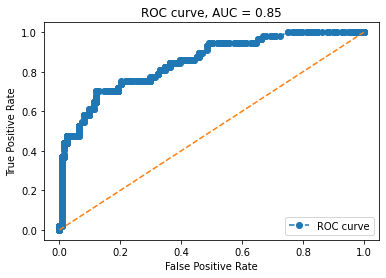

AUC score is 0.8503820033955858.


In [13]:
# Call function
actual = df['class']
prob = df['scored.probability']

# The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR)
roc_curve(actual, prob)

According to the ROC Curve results, we can infer that the relationship between sensitivity and specificity is performing well. The AUC calculation shows a 0.85, the higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes. So our model performs well.

#### 11. Applythe Python functions you’ve created to the relevant columns of the provided data set to produce the classification metrics specified in steps 5 through 9 of this assignment.

In [14]:
# Task 5: accuracy
accuracy = accuracy_metric(df['class'],df['scored.class'])
print("The accuracy is:    ",accuracy)

# Task 6: precision
precision = precision_metric(df['class'],df['scored.class'])
print("The precision is:    ",precision)

# Task 7: sensitivity
sensitivity = sensitivity_metric(df['class'],df['scored.class'])
print("The sensitivity is:    ",sensitivity)

# Task 8: specificity
specificity = specificity_metric(df['class'],df['scored.class'])
print("The specificity is:    ",specificity)

# Task 9: f1_score
f1_val = F1_score(df['class'],df['scored.class'])
print("The f1_score is:    ",f1_val)

The accuracy is:     0.8066298342541437
The precision is:     0.84375
The sensitivity is:     0.47368421052631576
The specificity is:     0.9596774193548387
The f1_score is:     0.6067415730337079


#### 12. Now compare the output of your functions against the output of the pre-built functions available within the scikit-learnlibrary. Specifically, apply the confusion_matrix(), accuracy_score(),  precision_score(), recall_score() (remember: recall = sensitivity), f1_score(), and the metrics.classification_report() functions to the relevant columns of the provided data set. Discuss how well the results of these pre-built functions compare to those of the functions you’ve created for this assignment.

In [15]:
# Load packages
from sklearn.metrics import confusion_matrix
con_matrix = pd.DataFrame(confusion_matrix(df['class'], df['scored.class']),columns = ['Predict 0', 'Predict 1'],
    index = ['True 0', 'True 1'])
con_matrix

,Predict 0,Predict 1
True 0,119,5
True 1,30,27


In [16]:
# Load packages
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Show the results
print("The accuracy is:  ",accuracy_score(df['class'],df['scored.class']))
print("The precision is:  ",precision_score(df['class'],df['scored.class']))
print("The recall is:   ",recall_score(df['class'],df['scored.class']))
print("The F1 Score is:  ",f1_score(df['class'],df['scored.class']))

The accuracy is:   0.8066298342541437
The precision is:   0.84375
The recall is:    0.47368421052631576
The F1 Score is:   0.6067415730337079


According to the results, pre-built functions show the same results as the functions we built. We calculated accuracy, precision, recall, and the F1 score. The pre-built functions are easy to use. However, by understanding the formulas and definitions, we are able to calculate the metrics by using pre-build functions more effectively.

#### 13. Using the metrics.plot_roc_curve () and metrics.auc() functions from the scikit-learn package to generate a ROC plotand calculate AUC for the provided data set. How do the results compare with the ROC/AUC function you’ve created for this assignment?

In [17]:
#pip install scikit-plot

C:\Users\11946\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


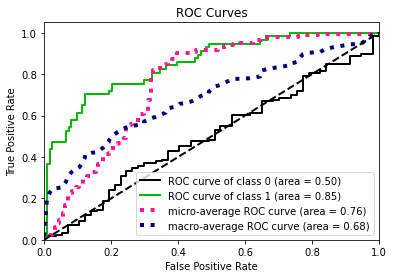

In [18]:
# Load packages
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn import metrics
y=df['class']
# Avoiding the index error, so we add the reset_index
y_probas=df['scored.probability'].reset_index().values

# Show the distribution
skplt.metrics.plot_roc_curve(y, y_probas, cmap='nipy_spectral')
plt.show()

In [19]:
# Load packages
from sklearn.metrics import roc_auc_score
# Use the roc_auc_score function to get the result
roc_auc_score(df['class'], df['scored.probability'])

0.8503112620260327

According to the result, the ROC curve of class 1 is very similar to the function we defined, which has a ROC score of 0.85, and it shows the accuracy of the model. The pre-build functions and our functions have their own advantages and depend on the number of thresholds, we can choose which one we prefer. As we create more models, we can have a better understanding of their performance. 








### Conclusion: 

Based on the results, our functions have very similar results with pre-build functions. After we build more models, we will have a better idea of these functions and how to use them in a more effective way. 




### Reference

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

- https://stackoverflow.com/questions/61321778/how-to-calculate-tpr-and-fpr-in-python-without-using-sklearn

- https://www.youtube.com/watch?v=afQ_DyKMxUo&ab_channel=SefikIlkinSerengil

- https://mmuratarat.github.io/2019-10-01/how-to-compute-AUC-plot-ROC-by-hand
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html